In [13]:
# initialize imports:
import numpy as np
import gzip
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [2]:
# Function to read pixel data from the dataset
def read_pixels(data_path):
    with gzip.open(data_path) as f:
        pixel_data = np.frombuffer(f.read(), 'B', offset=16).astype('float32')
    normalized_pixels = pixel_data / 255
    flattened_pixels = normalized_pixels.reshape(-1, 28 * 28)
    return flattened_pixels

In [3]:
# Function to read label data from the dataset
def read_labels(data_path):
    with gzip.open(data_path) as f:
        label_data = np.frombuffer(f.read(), 'B', offset=8)
    return label_data

In [4]:
images = read_pixels("data/train-images-idx3-ubyte.gz")
labels = read_labels("data/train-labels-idx1-ubyte.gz")

# Print the shape of the images and labels (for testing)
print(images.shape)
print(labels.shape)

(60000, 784)
(60000,)


In [5]:
# definition of covariance and eigen calculation functions:
def calculate_covariance_matrix(data):
    return np.cov(data, rowvar=False)

def calculate_eigens(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    return eigenvalues, eigenvectors

In [6]:
# Calculate the covariance matrix
covariance_matrix = np.cov(images, rowvar=False)

# Calculate eigenvectors and eigenvalues
eigenvalues, eigenvectors = calculate_eigens(covariance_matrix)

In [7]:
# Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

In [8]:
# Calculate PVE for the first 10 principal components
total_variance = np.sum(eigenvalues_sorted)
pve = eigenvalues_sorted / total_variance

# Display PVE for the first 10 principal components (Q1.1)
print("Proportion of Variance Explained (PVE) for the first 10 principal components:")
for i in range(10):
    print(f"PC{i + 1}: {pve[i]:.4f}")

Proportion of Variance Explained (PVE) for the first 10 principal components:
PC1: 0.0970
PC2: 0.0710
PC3: 0.0617
PC4: 0.0539
PC5: 0.0487
PC6: 0.0431
PC7: 0.0327
PC8: 0.0288
PC9: 0.0276
PC10: 0.0236


In [9]:
# Cumulative PVE (Q1.2)
cumulative_pve = np.cumsum(pve)
print("\nCumulative Proportion of Variance Explained:")
for i in range(cumulative_pve.shape[0]):
    print(f"PC{i + 1}: {cumulative_pve[i]:.4f}")
    if cumulative_pve[i] >= 0.7:
        break


Cumulative Proportion of Variance Explained:
PC1: 0.0970
PC2: 0.1680
PC3: 0.2297
PC4: 0.2836
PC5: 0.3323
PC6: 0.3754
PC7: 0.4081
PC8: 0.4370
PC9: 0.4646
PC10: 0.4881
PC11: 0.5092
PC12: 0.5295
PC13: 0.5466
PC14: 0.5636
PC15: 0.5793
PC16: 0.5942
PC17: 0.6074
PC18: 0.6202
PC19: 0.6321
PC20: 0.6436
PC21: 0.6542
PC22: 0.6643
PC23: 0.6738
PC24: 0.6830
PC25: 0.6918
PC26: 0.7002


In [10]:
components_subset = eigenvectors_sorted[:, :10]

# Define a function for min-max scaling
def min_max_scaling(matrix):
    min_val = np.min(matrix)
    max_val = np.max(matrix)
    scaled_matrix = (matrix - min_val) / (max_val - min_val)
    return scaled_matrix

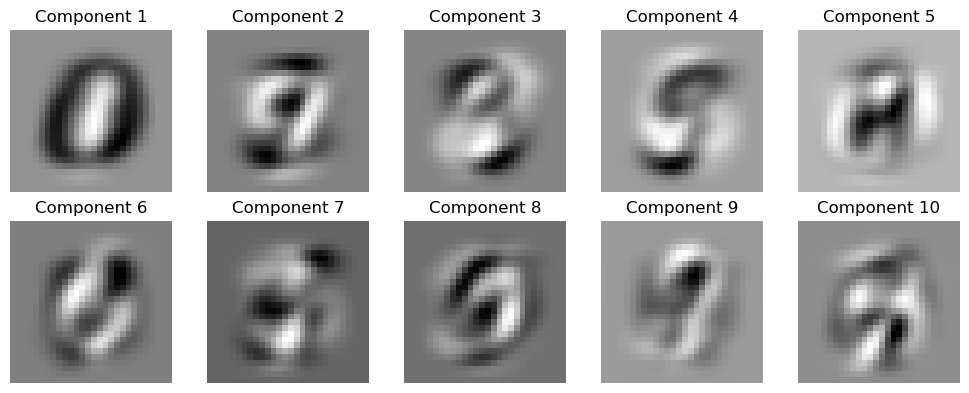

In [11]:
# Create a subplot for each principal component (question 1.3)
fig, axes = plt.subplots(2, 5, figsize=(10, 4))

# Reshape and scale each principal component
for i, ax in enumerate(axes.flat):
    component_i = components_subset[:, i]
    
    # Reshape it to a 28x28 matrix
    component_matrix = np.reshape(component_i, (28, 28))
    
    scaled_component = min_max_scaling(component_matrix)
    ax.imshow(scaled_component, cmap='gray')
    ax.set_title(f'Component {i + 1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

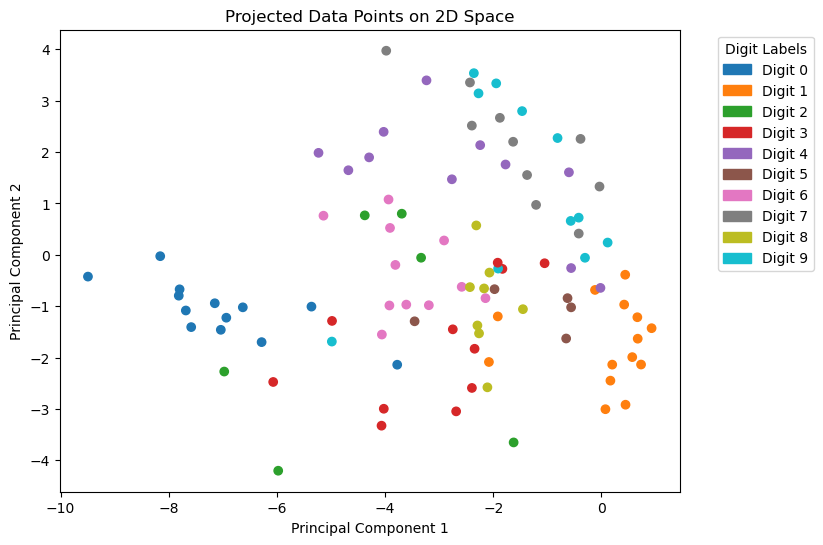

In [14]:
#Question 1.4:
# choose first 100 images:
dataset = images[:100]
# choose first 100 labels:
datalabels = labels[:100]
projected_data = np.dot(dataset, eigenvectors_sorted[:, :2])

# Choose different colors for each digit label
label_colors = plt.cm.tab10(np.arange(10))

plt.figure(figsize=(8, 6))
scatter = plt.scatter(projected_data[:, 0], projected_data[:, 1], c=label_colors[datalabels], cmap='viridis')
plt.title('Projected Data Points on 2D Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

legend_elements = [Patch(color=label_colors[i], label=f'Digit {i}') for i in range(10)]
plt.legend(handles=legend_elements, title='Digit Labels', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

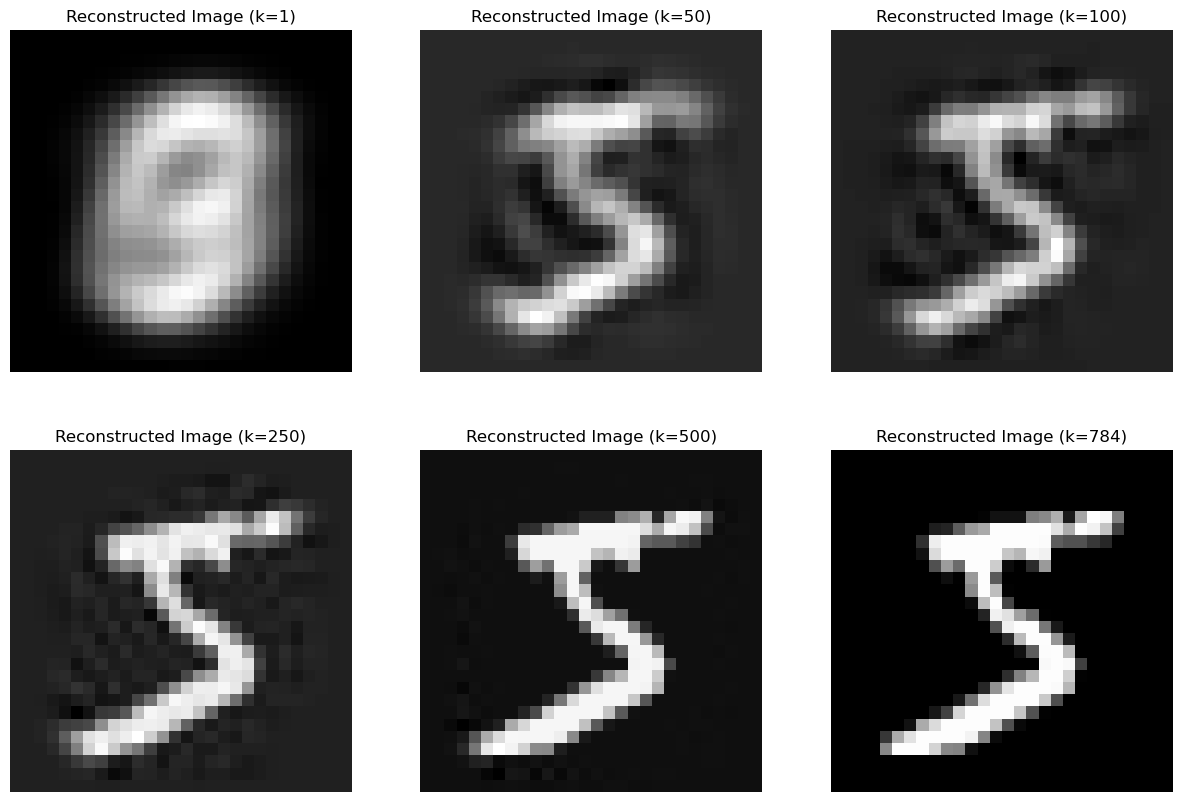

In [15]:
# Question 1.5
def reconstruct_image(img, eigenvectors, mean, k):
    data = np.dot(img - mean, eigenvectors[:, :k])
    reconstructed_image = np.dot(data, eigenvectors[:, :k].T) + mean
    return reconstructed_image

# Choose the first image:
img = images[0]

k_values = [1, 50, 100, 250, 500, 784]


plt.figure(figsize=(15, 10))
for i, k in enumerate(k_values, 1):
    # Reconstruct the image
    reconstructed_image = reconstruct_image(img, eigenvectors_sorted, np.mean(images, axis=0), k)

    plt.subplot(2, 3, i)
    plt.imshow(reconstructed_image.reshape(28, 28), cmap='gray')
    plt.title(f'Reconstructed Image (k={k})')
    plt.axis('off')

plt.show()